In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Гистограмма распределения размеров

In [68]:
sizes = np.loadtxt('sizes.dat')

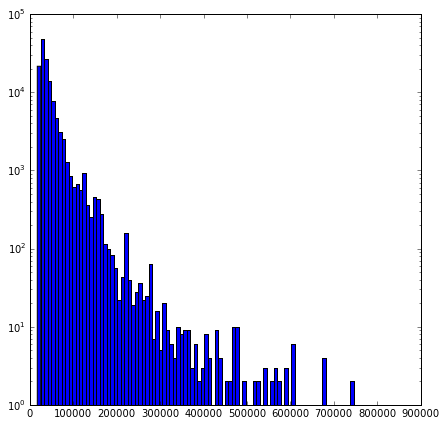

In [69]:
plt.figure(figsize=(7,7))
res = plt.hist(sizes[:,1], bins=100, log=True)

#Построить гистограмму распределения степеней вершин

In [110]:
indegs = np.loadtxt('indegrees.tsv', dtype=int)
outdegs = np.loadtxt('outdegrees.tsv', dtype=int)

In [111]:
np.max(outdegs[:,1])

2046

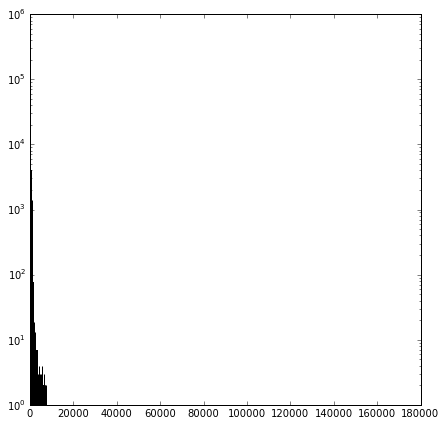

In [119]:
plt.figure(figsize=(7,7))
(n, bins, patches) = plt.hist((indegs[:,1], outdegs[:,1]), bins=1000, log=True)

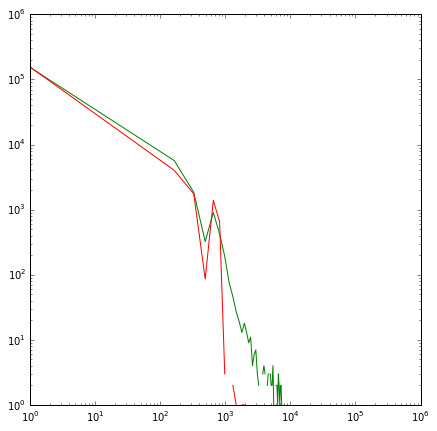

In [120]:
plt.figure(figsize=(7,7))
plotbins = bins[:-1]
plt.loglog(plotbins, n[0], c='g')
plt.loglog(plotbins, n[1], c='r')

#Построить гистограмму расстояний

In [93]:
patheslens = np.loadtxt('patheslengths.tsv')

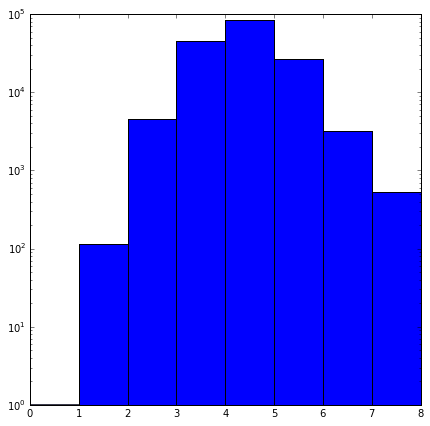

In [97]:
plt.figure(figsize=(7,7))
res = plt.hist(patheslens[:,1], bins=8, log=True)

#Построить гистограмму частот слов

In [114]:
wordsfreq = np.array(np.loadtxt('wordfreq.tsv', dtype=str)[:,1], dtype=int)

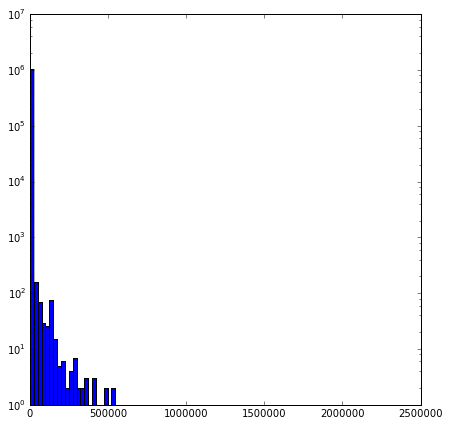

In [115]:
plt.figure(figsize=(7,7))
(n, bins, patches) = plt.hist(wordsfreq, bins=100, log=True)

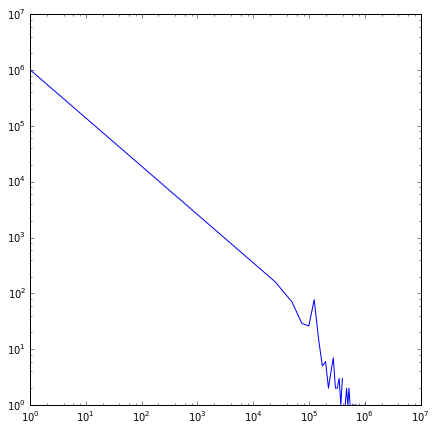

In [116]:
plt.figure(figsize=(7,7))
plotbins = bins[:-1]
plt.loglog(plotbins, n)

In [121]:
np.max(wordsfreq)

2484762

#Top-20 страниц по PageRank

In [122]:
ranks = np.loadtxt('ranks.tsv')
top20pages = sorted(ranks, key = lambda x: -x[1])[:20]

In [123]:
urls = np.loadtxt('urls.dat', dtype=str)
urlsdict = dict()
for el in urls:
    urlsdict[int(el[0])] = el[1]

In [146]:
for el in top20pages:
    print round(el[1],4), urlsdict[int(el[0])]

0.0389 http://simple.wikipedia.org/wiki/Main_Page
0.0068 http://simple.wikipedia.org/wiki/Multimedia
0.0045 http://simple.wikipedia.org/wiki/Category:Stubs
0.0028 http://simple.wikipedia.org/wiki/United_States
0.0024 http://simple.wikipedia.org/wiki/Definition
0.0019 http://simple.wikipedia.org/wiki/Category:Basic_English_850_words
0.0018 http://simple.wikipedia.org/wiki/English_language
0.0017 http://simple.wikipedia.org/wiki/Category:Technology_stubs
0.0015 http://simple.wikipedia.org/wiki/Country
0.0015 http://simple.wikipedia.org/wiki/International_Standard_Book_Number
0.0015 http://simple.wikipedia.org/wiki/Category:Geography_stubs
0.0013 http://simple.wikipedia.org/wiki/Category:Disambiguation
0.0013 http://simple.wikipedia.org/wiki/United_Kingdom
0.0013 http://simple.wikipedia.org/wiki/Government
0.0013 http://simple.wikipedia.org/wiki/Mathematics
0.0012 http://simple.wikipedia.org/wiki/France
0.0012 http://simple.wikipedia.org/wiki/Category:Biology_stubs
0.0011 http://simple.wi

In [137]:
def good(el):
    if '/Category:' not in el and '/Wikipedia_talk:' not in el and '/Category_Talk:' not in el and '/Help:' not in el\
    and '/MediaWiki:' not in el and '/MediaWiki_talk:' not in el and 'http://simple.wikipedia.org/?diff=' not in el\
    and '/Module:' not in el and '/Template_talk:' not in el:
        return True
    else:
        return False

In [138]:
i = 0
cleanTop20 = []
for el in sorted(ranks, key = lambda x: -x[1]): 
    if good(urlsdict[int(el[0])]) : 
        i += 1
        cleanTop20.append([el[1], urlsdict[int(el[0])]])
    if i == 19:
        break

In [148]:
for el in cleanTop20:
    print round(el[0],4), el[1]

0.0389 http://simple.wikipedia.org/wiki/Main_Page
0.0068 http://simple.wikipedia.org/wiki/Multimedia
0.0028 http://simple.wikipedia.org/wiki/United_States
0.0024 http://simple.wikipedia.org/wiki/Definition
0.0018 http://simple.wikipedia.org/wiki/English_language
0.0015 http://simple.wikipedia.org/wiki/Country
0.0015 http://simple.wikipedia.org/wiki/International_Standard_Book_Number
0.0013 http://simple.wikipedia.org/wiki/United_Kingdom
0.0013 http://simple.wikipedia.org/wiki/Government
0.0013 http://simple.wikipedia.org/wiki/Mathematics
0.0012 http://simple.wikipedia.org/wiki/France
0.0011 http://simple.wikipedia.org/wiki/Language
0.0011 http://simple.wikipedia.org/wiki/Europe
0.0011 http://simple.wikipedia.org/wiki/Christianity
0.0011 http://simple.wikipedia.org/wiki/Animal
0.001 http://simple.wikipedia.org/wiki/Audience
0.001 http://simple.wikipedia.org/wiki/Law
0.001 http://simple.wikipedia.org/wiki/Information
0.001 http://simple.wikipedia.org/wiki/Wiktionary
